In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential

In [ ]:
# Define the generator model
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim, activation='relu'))
    model.add(Dense(784, activation='sigmoid'))
    model.add(Reshape((28, 28, 1)))
    return model

In [ ]:
# Define the discriminator model
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [ ]:
# Load and preprocess the dataset (MNIST for this example)
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0  # Normalize pixel values

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Reshape the data and generate random noise
img_shape = (28, 28, 1)
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator(img_shape)
gan = build_gan(generator, discriminator)

In [ ]:
# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Compile the GAN
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
# Training parameters
batch_size = 64
epochs = 10000

In [ ]:
# Training loop
for epoch in range(epochs):
    # Train the discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise)
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, real_labels)

    # Print progress
    if (epoch % 100 == 0):
        print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss[0]} | D Accuracy: {100 * d_loss[1]} | G Loss: {g_loss}")


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 11ms/step
Epoch 5100/10000 | D Loss: 6.308051556348801 | D Accuracy: 25.78125 | G Loss: 6.847960321465507e-06
2/2 [==============================] - 0s 9ms/step
Epoch 5200/10000 | D Loss: 6.312625229358673 | D Accuracy: 25.78125 | G Loss: 6.138473963801516e-06
2/2 [==============================] - 0s 6ms/step
Epoch 5300/10000 | D Loss: 6.367488622665405 | D Accuracy: 21.09375 | G Loss: 6.551567821588833e-06
2/2 [==============================] - 0s 5ms/step
Epoch 5400/10000 | D Loss: 6.346355527639389 | D Accuracy: 28.125 | G Loss: 5.955817414360354e-06
2/2 [==============================] - 0s 11ms/step
Epoch 5500/10000 | D Loss: 6.359846353530884 | D Accuracy: 29.6875 | G Loss: 5.960279395367252e-06
2/2 [==============================] - 0s 5ms/step
Epoch 5600/10000 | D Loss: 6.396976351737976 | D Accuracy: 29.6875 | G Loss: 5.7977763390226755e-06
2/2 [==============================] - 0s 5m

1/1 [==============================] - 0s 195ms/step


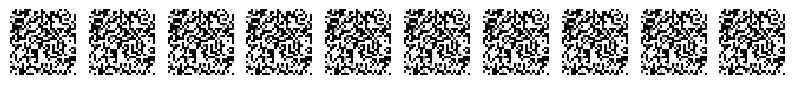

In [ ]:
def plot_generated_images(generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise)
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i].reshape(28, 28), interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.show()

plot_generated_images(generator)